# **Application of Random Forest for Flood Susceptibility Zonation**

## **Import Required Libraries**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

## **Read the Data**

In [31]:
training_df = pd.read_csv("D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\CSVs\Training_Data.csv")
testing_df = pd.read_csv("D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\CSVs\Testing_Data.csv")

In [32]:
training_df.head()

,Relief_Amplitude,Dist_to_River,TWI,Rainfall,Clay_Content,STI,TRI,TPI,SPI,NDVI,...,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,Lithology_S_Si_Gr,LULC_Agricultural_Field,LULC_Bare_Ground,LULC_Built_UP_Area,LULC_Natural_Vegetation,LULC_Waterbodies,Flood
0,0.142857,0.518128,0.165104,0.587614,0.785714,0.000000,0.280636,0.580849,0.000000e+00,0.700116,...,0,1,0,0,1,0,0,0,0,1
1,0.000000,0.128572,0.571387,0.344053,0.690476,0.000000,0.000000,0.501084,5.680000e-06,0.437787,...,0,1,0,0,1,0,0,0,0,1
2,0.061224,0.164325,0.149176,0.698571,0.761905,0.000000,0.177382,0.533338,0.000000e+00,0.601291,...,0,1,0,0,1,0,0,0,0,1
3,0.102041,0.433816,0.446274,0.324463,0.714286,0.000881,0.263824,0.460808,3.050000e-05,0.616554,...,0,0,0,0,1,0,0,0,0,1
4,0.122449,0.628029,0.320437,0.359155,0.738095,0.000070,0.327950,0.456793,7.680000e-07,0.572900,...,0,0,0,0,1,0,0,0,0,0


In [33]:
# Drop the geometry columns
training_df.drop("geometry", axis=1, inplace=True)
testing_df.drop("geometry", axis=1, inplace=True)

training_df.columns == testing_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [34]:
training_df.shape

(1582, 33)

In [35]:
# Check for the null values
training_df.isnull().sum().sum()

0

In [36]:
testing_df.isnull().sum().sum()

0

## **Specify the Train Test Data**

In [37]:
X_train, y_train = training_df.drop("Flood", axis=1), training_df["Flood"]
X_test, y_test = testing_df.drop("Flood", axis=1), testing_df["Flood"]

X_train.shape, X_test.shape

((1582, 32), (678, 32))

In [38]:
X_train.head()

,Relief_Amplitude,Dist_to_River,TWI,Rainfall,Clay_Content,STI,TRI,TPI,SPI,NDVI,...,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,Lithology_S_Si_Gr,LULC_Agricultural_Field,LULC_Bare_Ground,LULC_Built_UP_Area,LULC_Natural_Vegetation,LULC_Waterbodies
0,0.142857,0.518128,0.165104,0.587614,0.785714,0.000000,0.280636,0.580849,0.000000e+00,0.700116,...,0,0,1,0,0,1,0,0,0,0
1,0.000000,0.128572,0.571387,0.344053,0.690476,0.000000,0.000000,0.501084,5.680000e-06,0.437787,...,0,0,1,0,0,1,0,0,0,0
2,0.061224,0.164325,0.149176,0.698571,0.761905,0.000000,0.177382,0.533338,0.000000e+00,0.601291,...,0,0,1,0,0,1,0,0,0,0
3,0.102041,0.433816,0.446274,0.324463,0.714286,0.000881,0.263824,0.460808,3.050000e-05,0.616554,...,1,0,0,0,0,1,0,0,0,0
4,0.122449,0.628029,0.320437,0.359155,0.738095,0.000070,0.327950,0.456793,7.680000e-07,0.572900,...,1,0,0,0,0,1,0,0,0,0


In [39]:
# Change the datatype into float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

## **Feature Selection using Information Gain**

In [40]:
from sklearn.feature_selection import mutual_info_classif

In [41]:
# Determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01828467, 0.05357258, 0.05556471, 0.0702195 , 0.04631204,
       0.01505799, 0.09111938, 0.0216296 , 0.01768335, 0.0770007 ,
       0.01409196, 0.04765337, 0.1203309 , 0.02885641, 0.04360168,
       0.12551816, 0.00751701, 0.08169116, 0.02838435, 0.00427103,
       0.0184945 , 0.0212803 , 0.03144146, 0.        , 0.07622574,
       0.02592999, 0.        , 0.08587044, 0.00513631, 0.05306311,
       0.05705586, 0.        ])

In [42]:
# Convert the mutual info array into a pandas series
mutual_info = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)
mutual_info

Geomorphology_Active_Flood_Plain        0.125518
Elevation                               0.120331
TRI                                     0.091119
LULC_Agricultural_Field                 0.085870
Geomorphology_Older_Alluvial_Plain      0.081691
NDVI                                    0.077001
Lithology_S_Si_Cl                       0.076226
Rainfall                                0.070219
LULC_Natural_Vegetation                 0.057056
TWI                                     0.055565
Dist_to_River                           0.053573
LULC_Built_UP_Area                      0.053063
MFI                                     0.047653
Clay_Content                            0.046312
Drainage_Density                        0.043602
Lithology_Cl_wi_S_Si_Ir_N               0.031441
MNDWI                                   0.028856
Geomorphology_Older_Flood_Plain         0.028384
Lithology_S_Si_Cl_wi_Cal_Co             0.025930
TPI                                     0.021630
Geomorphology_Younge

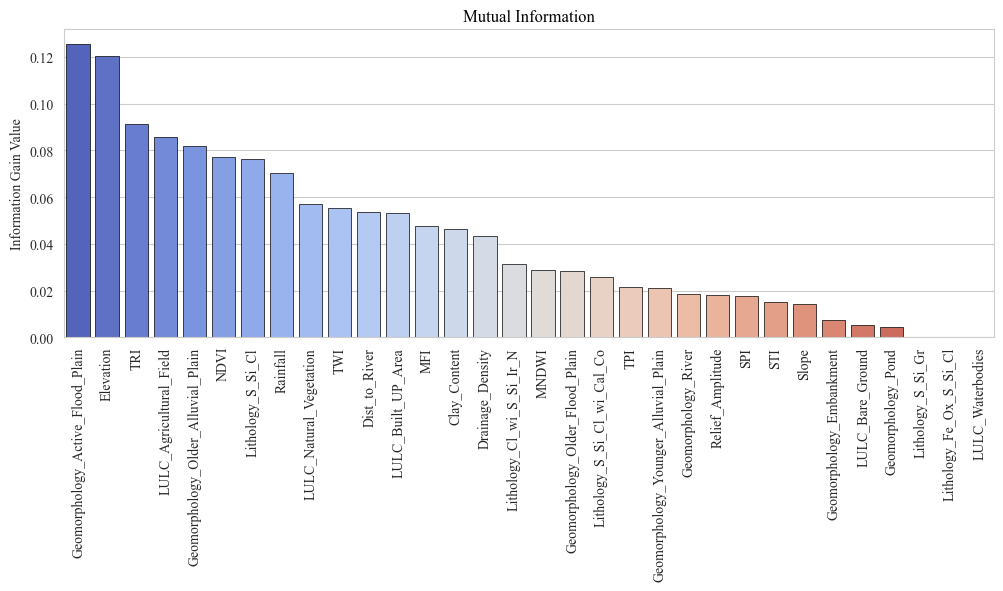

In [73]:
# Plot the orderd mutual_info values per feature
plt.figure(figsize=(12, 4), dpi=100)

# Define a color palette
color_palette = sns.color_palette(palette="coolwarm", n_colors=len(mutual_info))

sns.barplot(x=mutual_info.index, y=mutual_info, palette=color_palette,
            edgecolor="black", linewidth=0.5)
plt.title("Mutual Information", fontname="Times New Roman", color="black", fontsize=12)
plt.xticks(rotation=90)
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.ylabel("Information Gain Value", fontname="Times New Roman")
plt.show()

In [45]:
from sklearn.feature_selection import SelectKBest

In [46]:
# Select the top 20 important features
selected_features = SelectKBest(mutual_info_classif, k=20)
selected_features.fit(X_train, y_train)
selected_features = X_train.columns[selected_features.get_support()]
selected_features

Index(['Dist_to_River', 'TWI', 'Rainfall', 'Clay_Content', 'TRI', 'NDVI',
       'MFI', 'Elevation', 'MNDWI', 'Drainage_Density',
       'Geomorphology_Active_Flood_Plain',
       'Geomorphology_Older_Alluvial_Plain', 'Geomorphology_Older_Flood_Plain',
       'Lithology_Cl_wi_S_Si_Ir_N', 'Lithology_Fe_Ox_S_Si_Cl',
       'Lithology_S_Si_Cl', 'Lithology_S_Si_Cl_wi_Cal_Co',
       'LULC_Agricultural_Field', 'LULC_Built_UP_Area',
       'LULC_Natural_Vegetation'],
      dtype='object')

In [47]:
X_train = X_train[selected_features]
X_train

,Dist_to_River,TWI,Rainfall,Clay_Content,TRI,NDVI,MFI,Elevation,MNDWI,Drainage_Density,Geomorphology_Active_Flood_Plain,Geomorphology_Older_Alluvial_Plain,Geomorphology_Older_Flood_Plain,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,LULC_Agricultural_Field,LULC_Built_UP_Area,LULC_Natural_Vegetation
0,0.518128,0.165104,0.587614,0.785714,0.280636,0.700116,0.494337,0.346667,0.409042,0.197955,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.128572,0.571387,0.344053,0.690476,0.000000,0.437787,0.326095,0.120000,0.595915,0.695821,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.164325,0.149176,0.698571,0.761905,0.177382,0.601291,0.628901,0.280000,0.382371,0.492745,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.433816,0.446274,0.324463,0.714286,0.263824,0.616554,0.316538,0.386667,0.307860,0.212729,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.628029,0.320437,0.359155,0.738095,0.327950,0.572900,0.335859,0.573333,0.437553,0.028424,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0.247812,0.458075,0.339795,0.738095,0.167428,0.734888,0.337946,0.213333,0.430147,0.341095,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1578,0.373099,0.441171,0.752537,0.785714,0.213931,0.543738,0.755592,0.280000,0.279368,0.243732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1579,0.043243,0.521885,0.472152,0.785714,0.000000,0.680051,0.413672,0.240000,0.483247,0.091759,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1580,0.043243,0.218019,0.160826,0.761905,0.088422,0.757050,0.160709,0.173333,0.509301,0.189769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
X_test = X_test[selected_features]
X_test

,Dist_to_River,TWI,Rainfall,Clay_Content,TRI,NDVI,MFI,Elevation,MNDWI,Drainage_Density,Geomorphology_Active_Flood_Plain,Geomorphology_Older_Alluvial_Plain,Geomorphology_Older_Flood_Plain,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,LULC_Agricultural_Field,LULC_Built_UP_Area,LULC_Natural_Vegetation
0,0.017297,0.520829,0.088173,0.666667,0.270604,0.713929,0.088429,0.253333,0.440593,0.190851,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.008649,0.570254,0.871880,0.761905,0.138092,0.395510,0.854243,0.253333,0.250467,0.622337,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.079737,0.170232,0.475129,0.761905,0.237181,0.373748,0.427817,0.320000,0.398804,0.711552,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.017297,0.567649,0.370257,0.690476,0.094671,0.735108,0.395295,0.240000,0.452172,0.368527,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.453789,0.506040,0.605048,0.785714,0.000000,0.459768,0.543641,0.213333,0.572473,0.388870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.085180,0.490869,0.805669,0.000000,0.000000,0.416317,0.724173,0.186667,0.322653,0.906714,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
674,0.250812,0.611297,0.665655,0.785714,0.241167,0.415231,0.620405,0.320000,0.391361,0.336242,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
675,0.449732,0.098939,0.858297,0.761905,0.275839,0.720634,0.886617,0.306667,0.452278,0.356751,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
676,0.519858,0.090232,0.453336,0.714286,0.317311,0.560459,0.432133,0.373333,0.326396,0.303396,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Apply Random Forest Classification**

### **Build a Random Forest Classification Model**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Instantiate a RandomForestClassifier object
rf = RandomForestClassifier()

### **Hyperparameter Tuning**

In [51]:
# Define all the hyperparameters

# Number of trees in random forest
n_estimators = [50, 75, 100, 150, 200, 300]

# Criterion
criterion = ["gini", "entropy"]

# Maximum depth of each tree
max_depth = [2, 4, 6, 8, 10, None]

# Number of features to consider at each split
max_features = [0.2, 0.4, 0.6, 0.8, 1.0]

# Minimum number of samples required to split an internal node
min_samples_split = [2, 4, 8, 10]

# Minimumn number of samples required to be a leaf node
min_samples_leaf = [1, 2, 4, 8]

# Number of samples
max_samples = [0.25, 0.5, 0.75, 1.0]

# Bootstrap
bootstrap = [True, False]

In [52]:
# Define the parameter grid in a dictionary
rf_param_grid = {"n_estimators": n_estimators,
                 "criterion": criterion,
                 "max_depth": max_depth,
                 "max_features": max_features,
                 "min_samples_split": min_samples_split,
                 "min_samples_leaf": min_samples_leaf,
                 "max_samples": max_samples,
                 "bootstrap": bootstrap}
rf_param_grid

{'n_estimators': [50, 75, 100, 150, 200, 300],
 'criterion': ['gini', 'entropy'],
 'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
 'min_samples_split': [2, 4, 8, 10],
 'min_samples_leaf': [1, 2, 4, 8],
 'max_samples': [0.25, 0.5, 0.75, 1.0],
 'bootstrap': [True, False]}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# Apply Randomized Search CV
rf_grid = RandomizedSearchCV(estimator=rf,
                             param_distributions=rf_param_grid,
                             n_iter=1000,
                             scoring="accuracy",
                             n_jobs=-1,
                             cv=5,
                             verbose=1)

In [55]:
# Fit the training data to GridSearcCV
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'max_features': [0.2, 0.4, 0.6, 0.8,
                                                         1.0],
                                        'max_samples': [0.25, 0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [50, 75, 100, 150, 200,
                                                         300]},
                   scoring='accuracy', verbose=1)

In [56]:
rf_grid.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_samples': 1.0,
 'max_features': 0.4,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

In [57]:
# Check the best score
rf_grid.best_score_

0.850828574851256

In [58]:
# Build a Random Forest Model with best estimators
rf_final = rf_grid.best_estimator_
rf_final

RandomForestClassifier(criterion='entropy', max_features=0.4, max_samples=1.0,
                       min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50)

## **Accuracy Assessment**

In [59]:
# Predict the test data
y_pred = rf_final.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, classification_report

In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8510324483775811


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       323
           1       0.85      0.86      0.86       355

    accuracy                           0.85       678
   macro avg       0.85      0.85      0.85       678
weighted avg       0.85      0.85      0.85       678



## **Feature Importance**

In [64]:
# Get the feature importance
feature_importance = rf_final.feature_importances_

# Convert the feature importance into a pandas series
feature_importance = pd.Series(feature_importance, index=X_train.columns)

# Sort the values in descending order
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

Geomorphology_Active_Flood_Plain      0.188880
Elevation                             0.098984
LULC_Agricultural_Field               0.085893
MFI                                   0.073786
Rainfall                              0.067658
NDVI                                  0.060936
Geomorphology_Older_Alluvial_Plain    0.057646
Dist_to_River                         0.048495
Drainage_Density                      0.044479
Clay_Content                          0.041753
MNDWI                                 0.039270
LULC_Natural_Vegetation               0.036124
TWI                                   0.032179
TRI                                   0.031637
LULC_Built_UP_Area                    0.030466
Geomorphology_Older_Flood_Plain       0.028636
Lithology_S_Si_Cl                     0.018639
Lithology_Cl_wi_S_Si_Ir_N             0.012562
Lithology_S_Si_Cl_wi_Cal_Co           0.001976
Lithology_Fe_Ox_S_Si_Cl               0.000000
dtype: float64

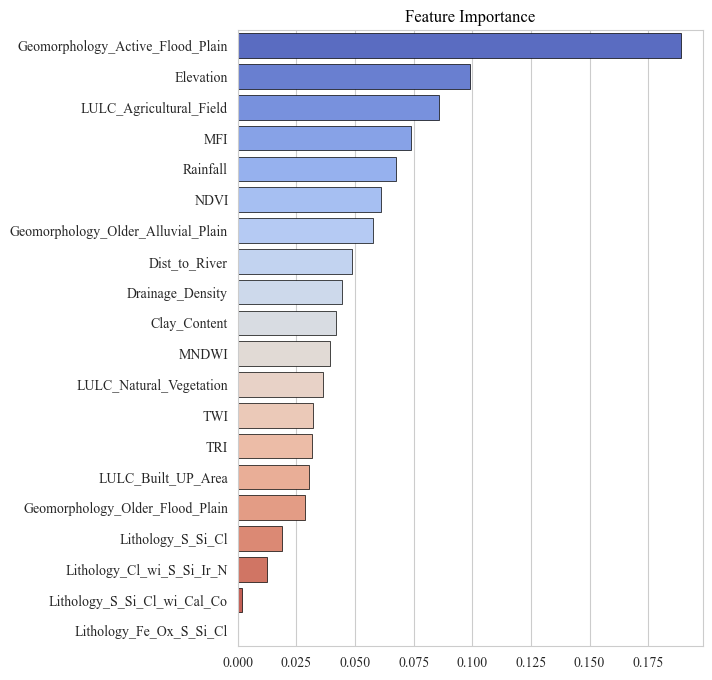

In [74]:
# Plot the feature importance
plt.figure(figsize=(6, 8), dpi=100)

# Define a color palette
color_palette = sns.color_palette(palette="coolwarm", n_colors=len(feature_importance))

sns.barplot(x=feature_importance, y=feature_importance.index, palette=color_palette, 
            edgecolor="black", linewidth=0.5)
plt.title("Feature Importance", fontname="Times New Roman", color="black", fontsize=12)
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.show()

## **Export the Model**

In [68]:
import pickle

In [69]:
output_folder = "D:\\Coding\\Git Repository\\Research Repo\\Flood\\Flood-Susceptibility-Zonation-of-Maldah\\Model\\"
model_name = "rf_model.pkl"

In [71]:
# Export the model
# pickle.dump(rf_final, file=open(output_folder+model_name, "wb"))